In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
result_dir = '/dgx1nas1/storage/data/sam/results'
run = 'Run6'

In [5]:
# Load results for supervised method
control_non_protein_supervised = pd.read_csv(f'{result_dir}/{run}/2023_05_30_B1A1R1_non_protein_control_f1score_normalized_feature_selected.csv')
control_protein_supervised = pd.read_csv(f'{result_dir}/{run}/2023_05_30_B1A1R1_protein_control_f1score_normalized_feature_selected.csv')

df_non_protein_supervised = pd.read_csv(f'{result_dir}/{run}/2023_05_30_B1A1R1_non_protein_f1score_normalized_feature_selected.csv')
df_protein_supervised = pd.read_csv(f'{result_dir}/{run}/2023_05_30_B1A1R1_protein_f1score_normalized_feature_selected.csv')

In [6]:
# Load results for non-supervised method
control_non_protein_unsupervised = pd.read_csv(f'{result_dir}/Run5/2023_05_30_B1A1R1_control_non_protein_f1score_normalized_feature_selected.csv')
control_protein_unsupervised = pd.read_csv(f'{result_dir}/Run5/2023_05_30_B1A1R1_control_f1score_normalized_feature_selected.csv')

df_protein_unsupervised = pd.read_csv(f'{result_dir}/Run5/2023_05_30_B1A1R1_f1score_normalized_feature_selected.csv')
df_non_protein_unsupervised = pd.read_csv(f'{result_dir}/Run5/2023_05_30_B1A1R1_non_protein_f1score_normalized_feature_selected.csv')

In [3]:
# Load results for supervised control
# control_non_protein_supervised = pd.read_csv(f'{result_dir}/Run3/2023_05_30_B1A1R1_non_protein_control_f1score_normalized_feature_selected.csv')
# control_protein_supervised = pd.read_csv(f'{result_dir}/Run3/2023_05_30_B1A1R1_protein_control_f1score_normalized_feature_selected.csv')

# control_non_protein_unsupervised = pd.read_csv(f'{result_dir}/Run5/2023_05_30_B1A1R1_control_non_protein_f1score_normalized_feature_selected.csv')
# control_protein_unsupervised = pd.read_csv(f'{result_dir}/Run5/2023_05_30_B1A1R1_control_f1score_normalized_feature_selected.csv')

In [4]:
# Load results for supervised method
# df_non_protein_supervised = pd.read_csv(f'{result_dir}/Run3/2023_05_30_B1A1R1_non_protein_f1score_normalized_feature_selected.csv')
# df_protein_supervised = pd.read_csv(f'{result_dir}/Run3/2023_05_30_B1A1R1_protein_f1score_normalized_feature_selected.csv')

# # Load results for non-supervised method
# df_protein_unsupervised = pd.read_csv(f'{result_dir}/Run5/2023_05_30_B1A1R1_f1score_normalized_feature_selected.csv')
# df_non_protein_unsupervised = pd.read_csv(f'{result_dir}/Run5/2023_05_30_B1A1R1_non_protein_f1score_normalized_feature_selected.csv')

In [7]:
df_protein_unsupervised['Variant'] = df_protein_unsupervised['Variant'].apply(lambda x: x.replace('_', ' ', 1))
df_non_protein_unsupervised['Variant'] = df_non_protein_unsupervised['Variant'].apply(lambda x: x.replace('_', ' ', 1))

In [8]:
df_protein_supervised.drop(['Plate'], axis=1, inplace=True)
df_non_protein_supervised.drop(['Plate'], axis=1, inplace=True)

In [9]:
# Take median value for each gene variant pairs
df_protein_unsupervised_agg = df_protein_unsupervised.groupby(['Gene', 'Variant'])['Cosine'].agg(np.median).reset_index()
df_protein_supervised_agg = df_protein_supervised.groupby(['Gene', 'Variant'])['F1_Score'].agg(np.median).reset_index()

df_non_protein_unsupervised_agg = df_non_protein_unsupervised.groupby(['Gene', 'Variant'])['Cosine'].agg(np.median).reset_index()
df_non_protein_supervised_agg = df_non_protein_supervised.groupby(['Gene', 'Variant'])['F1_Score'].agg(np.median).reset_index()

/tmp/ipykernel_48898/2410469415.py:2: FutureWarning: The provided callable <function median at 0x7ff0b809d080> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_protein_unsupervised_agg = df_protein_unsupervised.groupby(['Gene', 'Variant'])['Cosine'].agg(np.median).reset_index()
/tmp/ipykernel_48898/2410469415.py:3: FutureWarning: The provided callable <function median at 0x7ff0b809d080> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_protein_supervised_agg = df_protein_supervised.groupby(['Gene', 'Variant'])['F1_Score'].agg(np.median).reset_index()
/tmp/ipykernel_48898/2410469415.py:5: FutureWarning: The provided callable <function median at 0x7ff0b809d080> is currently using SeriesGroupBy.median. In a future version of panda

In [10]:
df_protein = df_protein_supervised_agg.merge(df_protein_unsupervised_agg, on = ['Gene', 'Variant'], how='inner')
df_non_protein = df_non_protein_supervised_agg.merge(df_non_protein_unsupervised_agg, on = ['Gene', 'Variant'], how='inner')

df_protein

,Gene,Variant,F1_Score,Cosine
0,ACSF3,ACSF3 Ala197Thr,0.621291,0.300432
1,ACSF3,ACSF3 Arg10Trp,0.604281,0.423416
2,ACSF3,ACSF3 Arg471Trp,0.744498,1.300440
3,ACSF3,ACSF3 Arg558Trp,0.733866,1.042178
4,ACSF3,ACSF3 Asp236Asn,0.608954,0.363913
...,...,...,...,...
797,WRAP53,WRAP53 Arg68Gly,0.846167,1.314355
798,XPA,XPA Cys108Phe,0.643180,0.362429
799,XRCC2,XRCC2 Phe270Val,0.639859,0.501521
800,ZMYND10,ZMYND10 Arg243Cys,0.954179,1.147649


In [11]:
def annotate_platemap (x: str):
    well_pair = x[-7:]
    plate_map = x[-12:-10]
    agg_annot = plate_map+'_'+well_pair
    return agg_annot

In [12]:
# control_protein_supervised['agg_annot'] = control_protein_supervised['Well_Pair'].apply(lambda x: annotate_platemap(x))
control_protein_supervised['agg_annot'] = control_protein_supervised['Plate'].apply(lambda x: x[-4:-2])+ '_' +control_protein_supervised['Well_Pair']
control_protein_unsupervised['agg_annot'] = control_protein_unsupervised['Plate'].apply(lambda x: x[-4:-2]) + '_' + control_protein_unsupervised['Well_One'] + '_' + control_protein_unsupervised['Well_Two']

control_non_protein_supervised['agg_annot'] = control_non_protein_supervised['Plate'].apply(lambda x: x[-4:-2])+ '_' +control_non_protein_supervised['Well_Pair']
control_non_protein_unsupervised['agg_annot'] = control_non_protein_unsupervised['Plate'].apply(lambda x: x[-4:-2]) + '_' + control_non_protein_unsupervised['Well_One'] + '_' + control_non_protein_unsupervised['Well_Two']

In [13]:
# Take median value for each gene variant pairs
control_protein_unsupervised_agg = control_protein_unsupervised.groupby('agg_annot')['Cosine'].agg(np.median).reset_index()
control_protein_supervised_agg = control_protein_supervised.groupby('agg_annot')['F1_Score'].agg(np.median).reset_index()

control_non_protein_unsupervised_agg = control_non_protein_unsupervised.groupby('agg_annot')['Cosine'].agg(np.median).reset_index()
control_non_protein_supervised_agg = control_non_protein_supervised.groupby('agg_annot')['F1_Score'].agg(np.median).reset_index()

/tmp/ipykernel_48898/1017219918.py:2: FutureWarning: The provided callable <function median at 0x7ff0b809d080> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  control_protein_unsupervised_agg = control_protein_unsupervised.groupby('agg_annot')['Cosine'].agg(np.median).reset_index()
/tmp/ipykernel_48898/1017219918.py:3: FutureWarning: The provided callable <function median at 0x7ff0b809d080> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  control_protein_supervised_agg = control_protein_supervised.groupby('agg_annot')['F1_Score'].agg(np.median).reset_index()
/tmp/ipykernel_48898/1017219918.py:5: FutureWarning: The provided callable <function median at 0x7ff0b809d080> is currently using SeriesGroupBy.median. In a future version of p

In [14]:
take_median = True

In [15]:
if take_median:
    control_pro_sup = control_protein_supervised_agg
    control_non_pro_sup = control_non_protein_supervised_agg
    control_pro_unsup = control_protein_unsupervised_agg
    control_non_pro_unsup = control_non_protein_unsupervised_agg
    df_pro_sup = df_protein_supervised_agg
    df_non_pro_sup = df_non_protein_supervised_agg
    df_pro_unsup = df_protein_unsupervised_agg
    df_non_pro_unsup = df_non_protein_unsupervised_agg
else:
    control_pro_sup = control_protein_supervised
    control_non_pro_sup = control_non_protein_supervised
    control_pro_unsup = control_protein_unsupervised
    control_non_pro_unsup = control_non_protein_unsupervised
    df_pro_sup = df_protein_supervised
    df_non_pro_sup = df_non_protein_supervised
    df_pro_unsup = df_protein_unsupervised
    df_non_pro_unsup = df_non_protein_unsupervised

In [16]:
thresh = 95
# Compute threshold for supervised results
print('Single cell classification:')
thresh_protein_supervised = np.percentile(np.array(control_pro_sup["F1_Score"]), thresh)
thresh_nonprotein_supervised = np.percentile(
    np.array(control_non_pro_sup["F1_Score"]), thresh
)

print(f"{thresh} percentil of protein control: {thresh_protein_supervised}")
print(f"{thresh} percentil of non-protein control: {thresh_nonprotein_supervised}")

propass = np.where(df_pro_sup["F1_Score"] > thresh_protein_supervised)[0].size
nonpropass = np.where(df_non_pro_sup["F1_Score"] > thresh_nonprotein_supervised)[
    0
].size

print(f"Number of variants passed threshold (protein): {propass}")
print(f"Number of variants passed threshold (non-protein): {nonpropass}")
print('_'*11)

# Compute threshold for unsupervised results
print('Well-level computataion:')
thresh_protein_unsupervised = np.percentile(np.array(control_pro_unsup["Cosine"]), thresh)
thresh_nonprotein_unsupervised = np.percentile(
    np.array(control_non_pro_unsup["Cosine"]), thresh
)

print(f"{thresh} percentil of protein control: {thresh_protein_unsupervised}")
print(f"{thresh} percentil of non-protein control: {thresh_nonprotein_unsupervised}")

propass_unsupervised = np.where(df_pro_unsup["Cosine"] > thresh_protein_unsupervised)[0].size
nonpropass_unsupervised = np.where(df_non_pro_unsup["Cosine"] > thresh_nonprotein_unsupervised)[
    0
].size

print(f"Number of variants passed threshold (protein): {propass_unsupervised}")
print(f"Number of variants passed threshold (non-protein): {nonpropass_unsupervised}")

Single cell classification:
95 percentil of protein control: 0.7901912553610292
95 percentil of non-protein control: 0.8742523542557318
Number of variants passed threshold (protein): 203
Number of variants passed threshold (non-protein): 192
___________
Well-level computataion:
95 percentil of protein control: 0.9842280228838302
95 percentil of non-protein control: 1.00826744559979
Number of variants passed threshold (protein): 235
Number of variants passed threshold (non-protein): 176


In [17]:
print(control_pro_sup.shape)
print(control_pro_unsup.shape)
print(df_pro_sup.shape)
print(df_pro_unsup.shape)

(197, 2)
(197, 2)
(802, 3)
(802, 3)


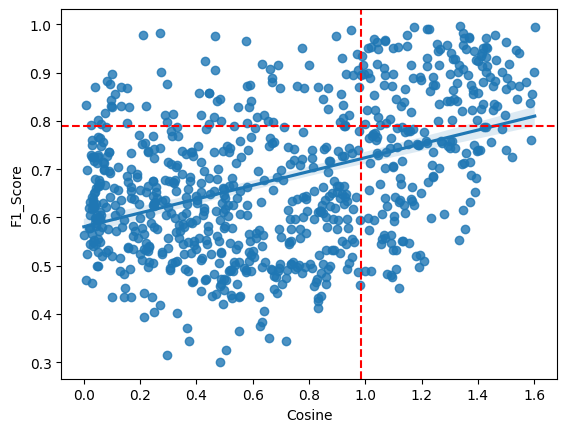

In [18]:
sns.regplot(x = df_protein['Cosine'], y = df_protein['F1_Score'])
plt.axhline(thresh_protein_supervised, color='red', linestyle='--')
plt.axvline(thresh_protein_unsupervised, color='red', linestyle='--')

/dgx1nas1/storage/data/sam/.conda/envs/varchamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/dgx1nas1/storage/data/sam/.conda/envs/varchamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/dgx1nas1/storage/data/sam/.conda/envs/varchamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/dgx1nas1/storage/data/sam/.conda/envs/varchamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categoric

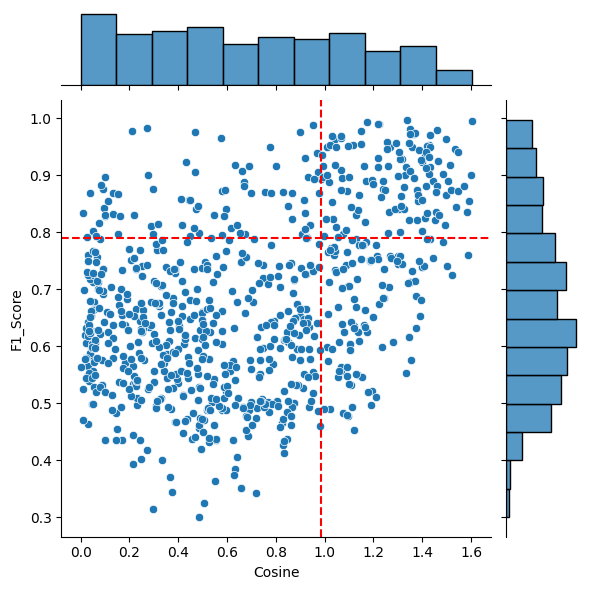

In [19]:
sns.jointplot(
    data=df_protein,
    x="Cosine", y="F1_Score",
    kind="scatter"
)
plt.axhline(thresh_protein_supervised, color='red', linestyle='--')
plt.axvline(thresh_protein_unsupervised, color='red', linestyle='--')

/dgx1nas1/storage/data/sam/.conda/envs/varchamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/dgx1nas1/storage/data/sam/.conda/envs/varchamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/dgx1nas1/storage/data/sam/.conda/envs/varchamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/dgx1nas1/storage/data/sam/.conda/envs/varchamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categoric

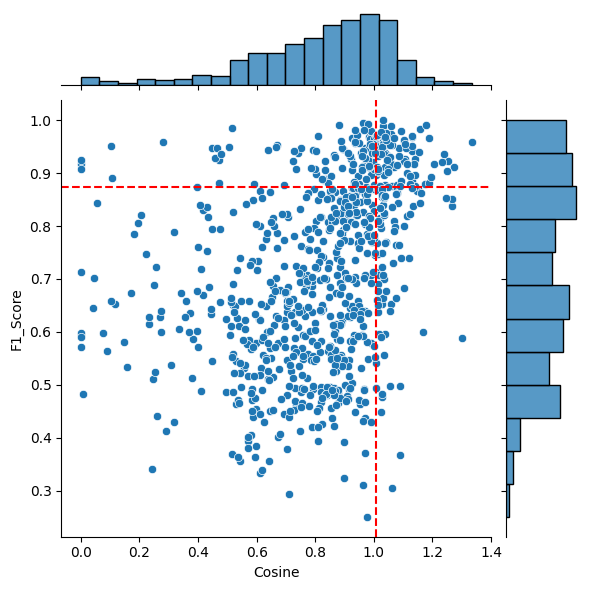

In [20]:
sns.jointplot(
    data=df_non_protein,
    x="Cosine", y="F1_Score",
    kind="scatter"
)
plt.axhline(thresh_nonprotein_supervised, color='red', linestyle='--')
plt.axvline(thresh_nonprotein_unsupervised, color='red', linestyle='--')

In [29]:
sup_pro = list(df_protein.iloc[np.where(df_protein["F1_Score"] > thresh_protein_supervised)]['Variant'])
unsup_pro = list(df_protein.iloc[np.where(df_protein["Cosine"] > thresh_protein_unsupervised)]['Variant'])
sup_nonpro = list(df_non_protein.iloc[np.where(df_non_protein["F1_Score"] > thresh_nonprotein_supervised)]['Variant'])
unsup_nonpro = list(df_non_protein.iloc[np.where(df_non_protein["Cosine"] > thresh_nonprotein_unsupervised)]['Variant'])

In [23]:
from matplotlib_venn import venn2_unweighted  

In [24]:
def create_venn(list1, list2):
    com = len(list(set(list1) & set(list2)))
    list1_uniq = len(set(list1) - set(list2))
    list2_uniq = len(set(list2) - set(list1))
    return com, list1_uniq, list2_uniq

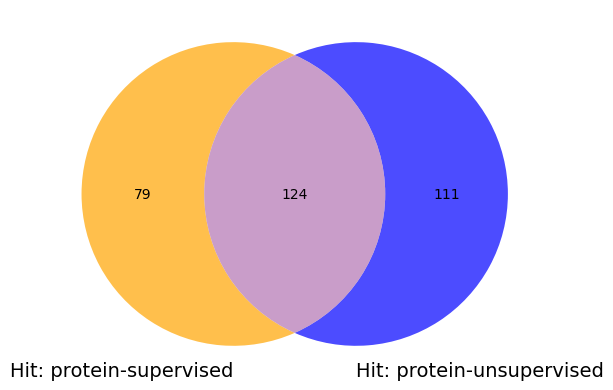

In [26]:
com, list1_uniq, list2_uniq = create_venn(sup_pro, unsup_pro)
# depict venn diagram 
out = venn2_unweighted(subsets = (list1_uniq, list2_uniq, com), 
                 set_labels = ('Hit: protein-supervised',  
                               'Hit: protein-unsupervised'), 
                 set_colors=("orange", 
                             "blue"),alpha=0.7) 
for text in out.set_labels:
    text.set_fontsize(14)
plt.show()

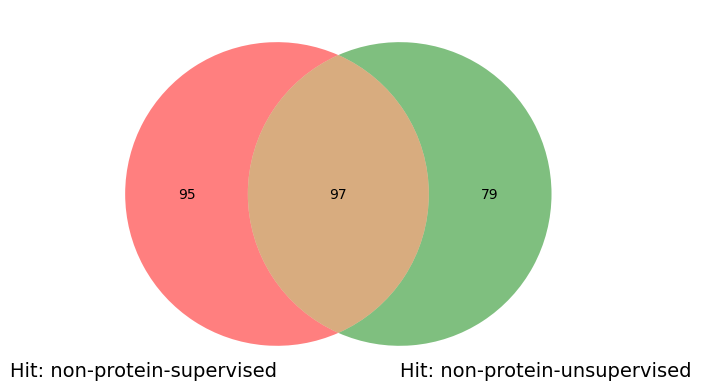

In [30]:
com, list1_uniq, list2_uniq = create_venn(sup_nonpro, unsup_nonpro)
# depict venn diagram 
out = venn2_unweighted(subsets = (list1_uniq, list2_uniq, com), 
                 set_labels = ('Hit: non-protein-supervised',  
                               'Hit: non-protein-unsupervised'), 
                 set_colors=("red", 
                             "green"),alpha=0.5) 
for text in out.set_labels:
    text.set_fontsize(14)
plt.show()

In [35]:
list(set(unsup_pro)-set(sup_pro))

['TH Thr368Met',
 'PMP22 Gly150Cys',
 'ACSF3 Arg558Trp',
 'MVK Val377Ile',
 'MLH1 Ile36Asn',
 'MLH1 Asp485Glu',
 'IER3IP1 Val21Gly',
 'GCK Gly175Arg',
 'MVK Asp386Asn',
 'KRT6A Glu461Lys',
 'MLH1 Lys751Arg',
 'MVK Pro288Leu',
 'PKP2 Arg204His',
 'ACSF3 Pro285Leu',
 'NAA10 Arg116Trp',
 'PLA2G6 Arg538Cys',
 'PYGL Glu673Lys',
 'PKP2 Leu394His',
 'HBD Glu27Asp',
 'SH3BP2 Gly420Glu',
 'TRAF3 Arg118Trp',
 'STAR Arg182His',
 'FBP1 Phe233Ile',
 'TAT Pro220Ser',
 'TH Arg89Arg',
 'TAT Arg433Trp',
 'STXBP1 Arg292Cys',
 'PLP1 Leu189Pro',
 'PKP2 Gln62Lys',
 'STXBP1 Arg406Leu',
 'TH Arg202His',
 'STXBP1 Gly417Asp',
 'TH Glu27Asp',
 'MVK His20Pro',
 'STXBP1 Arg235Gln',
 'PKP2 Val543Ile',
 'MLH1 Ala681Val',
 'STXBP1 Cys180Tyr',
 'MVK Cys101Tyr',
 'MLH1 Ser295Thr',
 'EIF2B4 Ala228Val',
 'PITX1 Glu130Lys',
 'ACSF3 Met266Val',
 'PITX2 Arg144Pro',
 'PKP2 Met365Val',
 'PYGL Asp634His',
 'SFTPC His59Arg',
 'LITAF Ser118Pro',
 'COMP Asp319Val',
 'MCEE Ala76Val',
 'STXBP1 Arg406His',
 'STAR Val187Met',
 'TTPA

In [40]:
df_protein[df_protein['Variant']=='STXBP1 Cys180Tyr']

,Gene,Variant,F1_Score,Cosine
712,STXBP1,STXBP1 Cys180Tyr,0.684515,1.240201


In [41]:
sup_pro

['ACSF3 Gly119Asp',
 'AGXT Ala210Pro',
 'AGXT Ala85Asp',
 'AGXT Arg289His',
 'AGXT Arg36Cys',
 'AGXT Asp129His',
 'AGXT Asp201Asn',
 'AGXT Asp341Glu',
 'AGXT Gly116Arg',
 'AGXT Gly156Arg',
 'AGXT Gly161Arg',
 'AGXT Gly161Ser',
 'AGXT Ile202Asn',
 'AGXT Ile279Met',
 'AGXT Ile279Thr',
 'AGXT Leu298Pro',
 'AGXT Met195Leu',
 'AGXT Ser187Phe',
 'AGXT Ser218Leu',
 'AGXT Ser221Pro',
 'AIPL1 Arg270His',
 'AIPL1 Met79Thr',
 'AMPD2 Glu697Asp',
 'APOA1 Ala188Ser',
 'APOA1 Ala199Pro',
 'APOA1 Arg197Cys',
 'APOA1 Arg34Leu',
 'APOA1 Leu114Pro',
 'APOA1 Leu198Ser',
 'APOA1 Leu84Arg',
 'APOA1 Trp74Arg',
 'APOA1 Val180Glu',
 'ASNS Ala6Glu',
 'BAG3 Arg218Trp',
 'BAG3 Arg258Trp',
 'BAG3 Arg477His',
 'BAG3 Leu462Pro',
 'BAG3 Pro380Ser',
 'BCL10 Leu8Leu',
 'BFSP2 Arg287Trp',
 'CA8 Arg237Gln',
 'CDC73 Met1Ile',
 'CDKN1A Ser31Arg',
 'CFP Tyr414Asp',
 'CHN1 Pro252Ser',
 'CLCNKA Trp80Cys',
 'COMP Asn555Lys',
 'COMP Asp408His',
 'COMP Asp511Glu',
 'COMP Asp530Glu',
 'COMP Asp605Asn',
 'COMP Gly207Asp',
 'COMP H